# Classification Results

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm 
import pingouin as pg
#import scikit_posthocs as sp

In [29]:
#ChatGPT provided method for extracting data
from tbparse import SummaryReader

reader = SummaryReader("C:/Users/mlovh/OneDrive/Dokumenter/V2025/AI_kidney_diagnosis_assistant\ML/classification/results\cnnweak_['drsbru']_20250507-164647")
df_drsbru_acc = reader.scalars

reader = SummaryReader("C:/Users/mlovh/OneDrive/Dokumenter/V2025/AI_kidney_diagnosis_assistant\ML/classification/results\cnnweak_['drsprg', 'drsbru']_20250507-205216")
df_both_acc = reader.scalars

reader = SummaryReader("C:/Users/mlovh/OneDrive/Dokumenter/V2025/AI_kidney_diagnosis_assistant\ML/classification/results\cnnweak_['drsprg']_20250507-155953")
df_drsprg_acc = reader.scalars

In [5]:
#ChatGPT provided method for extracting data
from tbparse import SummaryReader

reader = SummaryReader("/Users/eriktorvbraten/Dev/NTNU/Master/AI_kidney_diagnosis_assistant/ML/classification/results/cnnweak_['drsbru']_20250507-164647")
df_drsbru_acc = reader.scalars

reader = SummaryReader("/Users/eriktorvbraten/Dev/NTNU/Master/AI_kidney_diagnosis_assistant/ML/classification/results/cnnweak_['drsprg', 'drsbru']_20250507-205216")
df_both_acc = reader.scalars

reader = SummaryReader("/Users/eriktorvbraten/Dev/NTNU/Master/AI_kidney_diagnosis_assistant/ML/classification/results/cnnweak_['drsprg']_20250507-155953")
df_drsprg_acc = reader.scalars

ValueError: File or directory not found: /Users/eriktorvbraten/Dev/NTNU/Master/AI_kidney_diagnosis_assistant/ML/classification/results/cnnweak_['drsbru']_20250507-164647

In [30]:
df_drsprg_acc.head()

,step,tag,value
0,1,3D CNN + NN RADIOMICS acc,0.454545
1,2,3D CNN + NN RADIOMICS acc,0.363636
2,3,3D CNN + NN RADIOMICS acc,0.545455
3,4,3D CNN + NN RADIOMICS acc,0.700000
4,5,3D CNN + NN RADIOMICS acc,0.700000


In [10]:
#Process data

df_drsprg_acc['tag'] = df_drsprg_acc['tag'].str.replace('acc', '')
df_drsprg_acc['radiomics'] = df_drsprg_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_drsprg_acc['model'] = df_drsprg_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.strip()
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.replace("3D CNN +", "")
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.replace("BASELINE", "2D ResNet18")

In [ ]:
# CHATII <3

results_summary = df_drsprg_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()

results_summary['mean'] = results_summary['mean'].round(2)
results_summary['std'] = results_summary['std'].round(2)

print(results_summary)


   radiomics        model  mean   std
0      False           NN  0.52  0.09
1      False  2D ResNet18  0.53  0.13
2      False           ET  0.61  0.12
3      False     Ensemble  0.66  0.08
4      False       Logreg  0.62  0.09
5      False           RF  0.64  0.12
6      False          SVM  0.65  0.09
7       True           NN  0.55  0.13
8       True  2D ResNet18  0.42  0.17
9       True           ET  0.61  0.10
10      True     Ensemble  0.65  0.10
11      True       Logreg  0.57  0.10
12      True           RF  0.66  0.15
13      True          SVM  0.65  0.08


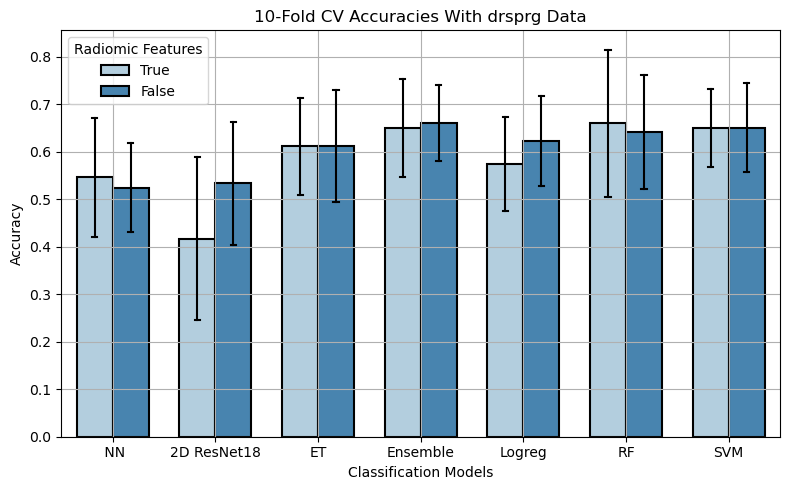

In [11]:
fig = plt.figure(figsize=(8, 5))

# Create the barplot with SD error bars
sns.barplot(
    data=df_drsprg_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Blues',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsprg Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.tight_layout()
plt.savefig('drsprg_accuracy.pdf', bbox_inches='tight')
plt.show()

# DRSBRU

In [18]:

df_drsbru_acc['tag'] = df_drsbru_acc['tag'].str.replace('acc', '')
df_drsbru_acc['radiomics'] = df_drsbru_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_drsbru_acc['model'] = df_drsbru_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.strip()
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.replace("3D CNN +", "")
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.replace("BASELINE", "2D ResNet18")

In [20]:
# CHATII <3

results_summary = df_drsbru_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()

results_summary['mean'] = results_summary['mean'].round(2)
results_summary['std'] = results_summary['std'].round(2)

print(results_summary)


   radiomics        model  mean   std
0      False           NN  0.59  0.08
1      False  2D ResNet18  0.51  0.11
2      False           ET  0.59  0.07
3      False     Ensemble  0.60  0.07
4      False       Logreg  0.42  0.15
5      False           RF  0.56  0.09
6      False          SVM  0.58  0.06
7       True           NN  0.56  0.08
8       True  2D ResNet18  0.47  0.16
9       True           ET  0.59  0.06
10      True     Ensemble  0.59  0.07
11      True       Logreg  0.48  0.16
12      True           RF  0.57  0.07
13      True          SVM  0.59  0.07


In [ ]:
fig = plt.figure(figsize=(8, 5))
# Create the barplot with SD error bars
sns.barplot(
    data=df_drsbru_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Greens',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsbru Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.tight_layout()
plt.savefig('drsbru_accuracy.pdf', bbox_inches='tight')
plt.show()

# Both

In [21]:
df_both_acc['tag'] = df_both_acc['tag'].str.replace('acc', '')
df_both_acc['radiomics'] = df_both_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_both_acc['model'] = df_both_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_both_acc['model'] = df_both_acc['model'].str.strip()
df_both_acc['model'] = df_both_acc['model'].str.replace("3D CNN +", "")
df_both_acc['model'] = df_both_acc['model'].str.replace("BASELINE", "2D ResNet18")

In [23]:
# CHATII <3

results_summary = df_both_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()

results_summary['mean'] = results_summary['mean'].round(2)
results_summary['std'] = results_summary['std'].round(2)

print(results_summary)


   radiomics        model  mean   std
0      False           NN  0.56  0.12
1      False  2D ResNet18  0.47  0.14
2      False           ET  0.60  0.08
3      False     Ensemble  0.64  0.07
4      False       Logreg  0.60  0.12
5      False           RF  0.62  0.09
6      False          SVM  0.64  0.10
7       True           NN  0.50  0.11
8       True  2D ResNet18  0.48  0.08
9       True           ET  0.62  0.09
10      True     Ensemble  0.63  0.10
11      True       Logreg  0.58  0.10
12      True           RF  0.61  0.09
13      True          SVM  0.62  0.11


In [ ]:
fig = plt.figure(figsize=(8, 5))

# Create the barplot with SD error bars
sns.barplot(
    data=df_both_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Reds',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsbru and drsprg Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.tight_layout()
plt.savefig('both_accuracy.pdf', bbox_inches='tight')
plt.show()

In [223]:
reader = SummaryReader("C:/Users/mlovh/OneDrive/Dokumenter/V2025/AI_kidney_diagnosis_assistant\ML/classification/results\cnnweak_['drsprg', 'drsbru']_20250507-205216")
df_both_pr = reader.text

In [224]:
df_both_pr.head(30)

,step,tag,value
0,1,3D CNN + NN precision,[1. 0.66666667 0.33333333 0. 0...
1,2,3D CNN + NN precision,[1. 0.61538462 1. 1. 0...
2,3,3D CNN + NN precision,[0.33333333 0.3 0.33333333 0. 1...
3,4,3D CNN + NN precision,[0.33333333 0.4 0.5 0. 0...
4,5,3D CNN + NN precision,[0.5 0.42857143 0.66666667 0. 0...
5,6,3D CNN + NN precision,[0.75 0.66666667 0.6 0. 0...
6,7,3D CNN + NN precision,[0.6 0.57142857 0.8 1. 1...
7,8,3D CNN + NN precision,[0.66666667 0.66666667 0.5 0. 1...
8,9,3D CNN + NN precision,[0.57142857 0.66666667 0.75 0. 0...
9,10,3D CNN + NN precision,[0.5 0.42857143 0.4 0. 1...


In [225]:
#df_both_pr['tag'] = df_both_pr['tag'].str.replace('acc', '')
df_both_pr['radiomics'] = df_both_pr['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_both_pr['precision'] = df_both_pr['tag'].str.contains(r'precision').map({True: 'True', False: 'False'})
df_both_pr['model'] = df_both_pr['tag'].str.replace(r'RADIOMICS|rad|precision|recall', '', regex=True)
df_both_pr['model'] = df_both_pr['model'].str.replace(r'(B3D CNN \+|3D CNN \+)', '', regex=True)
df_both_pr['model'] = df_both_pr['model'].str.strip()

In [227]:
df_both_pr.head(40)

,step,tag,value,radiomics,precision,model
0,1,3D CNN + NN precision,[1. 0.66666667 0.33333333 0. 0...,False,True,NN
1,2,3D CNN + NN precision,[1. 0.61538462 1. 1. 0...,False,True,NN
2,3,3D CNN + NN precision,[0.33333333 0.3 0.33333333 0. 1...,False,True,NN
3,4,3D CNN + NN precision,[0.33333333 0.4 0.5 0. 0...,False,True,NN
4,5,3D CNN + NN precision,[0.5 0.42857143 0.66666667 0. 0...,False,True,NN
5,6,3D CNN + NN precision,[0.75 0.66666667 0.6 0. 0...,False,True,NN
6,7,3D CNN + NN precision,[0.6 0.57142857 0.8 1. 1...,False,True,NN
7,8,3D CNN + NN precision,[0.66666667 0.66666667 0.5 0. 1...,False,True,NN
8,9,3D CNN + NN precision,[0.57142857 0.66666667 0.75 0. 0...,False,True,NN
9,10,3D CNN + NN precision,[0.5 0.42857143 0.4 0. 1...,False,True,NN


In [237]:
## FILTER MODELS
models_include = ["Baseline", "Ensemble", "NN"]
df_both_pr = df_both_pr[
    (df_both_pr['radiomics'] == 'False') &
    (df_both_pr['model'].isin(models_include))
]

In [238]:
df_both_pr.head(50)

,step,tag,value,radiomics,precision,model,1,2,3,4,5
0,1,3D CNN + NN precision,1. 0.66666667 0.33333333 0. 0.,False,True,NN,1.000000,0.666667,0.333333,0.000000,0.000000
1,2,3D CNN + NN precision,1. 0.61538462 1. 1. 0.5,False,True,NN,1.000000,0.615385,1.000000,1.000000,0.500000
2,3,3D CNN + NN precision,0.33333333 0.3 0.33333333 0. 1.,False,True,NN,0.333333,0.300000,0.333333,0.000000,1.000000
3,4,3D CNN + NN precision,0.33333333 0.4 0.5 0. 0.5,False,True,NN,0.333333,0.400000,0.500000,0.000000,0.500000
4,5,3D CNN + NN precision,0.5 0.42857143 0.66666667 0. 0.5,False,True,NN,0.500000,0.428571,0.666667,0.000000,0.500000
5,6,3D CNN + NN precision,0.75 0.66666667 0.6 0. 0.5,False,True,NN,0.750000,0.666667,0.600000,0.000000,0.500000
6,7,3D CNN + NN precision,0.6 0.57142857 0.8 1. 1.,False,True,NN,0.600000,0.571429,0.800000,1.000000,1.000000
7,8,3D CNN + NN precision,0.66666667 0.66666667 0.5 0. 1.,False,True,NN,0.666667,0.666667,0.500000,0.000000,1.000000
8,9,3D CNN + NN precision,0.57142857 0.66666667 0.75 0. 0.33333333,False,True,NN,0.571429,0.666667,0.750000,0.000000,0.333333
9,10,3D CNN + NN precision,0.5 0.42857143 0.4 0. 1.,False,True,NN,0.500000,0.428571,0.400000,0.000000,1.000000


In [239]:
#df_both_pr['model'] = df_both_pr['model'].str.replace("B3D CNN + NN", "Baseline") # hva er b3d cnn?
#df_both_pr['model'] = df_both_pr['model'].str.replace("3D CNN +", "")
df_both_pr['value'] = (
    df_both_pr['value']
    .str.replace(r'[\[\]]', '', regex=True)  
    .str.replace(r'\s{2,}', ' ', regex=True)    
    .str.strip()                               
)
df_both_pr[['1', '2', '3', '4', '5']] = df_both_pr['value'].str.split(" ", expand=True).astype(float)

In [240]:
df_grouped = (
    df_both_pr
    .groupby(['radiomics', 'precision', 'model'])[['1', '2', '3', '4', '5']]
    .mean()
    .round(2)         
    .reset_index()
)


In [242]:
df_grouped.head(10)

,radiomics,precision,model,1,2,3,4,5
0,False,False,Baseline,0.23,0.70,0.36,0.60,0.20
1,False,False,Ensemble,0.53,0.77,0.48,0.60,0.90
2,False,False,NN,0.56,0.63,0.52,0.15,0.90
3,False,True,Baseline,0.34,0.50,0.52,0.26,0.06
4,False,True,Ensemble,0.70,0.57,0.58,0.70,0.85
5,False,True,NN,0.63,0.54,0.59,0.20,0.63
